# Introduction to unsupervised learning

## Overview of machine learning (ML) algorithms

Broadly speaking, we can categorize machine learning algorithms into three groups:

1.  *Supervised learning*

    Models in this group use both input data (often called independent variables, features, 
    covariates, predictors, or $X$ variables) and the corresponding output data 
    (dependent variable, outcome, target, or $y$ variable) to establish some relationship 
    $y = f(X)$ within a training data set. We can then use this relationship to make
    predictions about outputs in new data.

    Subcategories within this group include:

    - Regression, where output data is allowed to take on continuous values; and
    - Classification, where output data is restricted to a few values,
      often called categories or labels.
      
2. *Unsupervised learning*

    In this scenario, machine learning algorithms operate on unlabelled data,
    i.e., there is no explicit outcome variable. We can, however, use machine
    learning to structure or reduce this data, for example by

    - Clustering, where we organise data into meaningful subgroups (clusters); or
    - Dimensionality reduction, where possibly high-dimensional data is 
      compressed into fewer dimensions while preserving relevant information.

      One of the most widely used examples of dimensionality reduction is
      principal component analysis (PCA) which we study in more detail below.

3. *Reinforcement learning* 

    We won't be concerned with ML algorithms that fall into this category
    in this part of the course.

***
## Principal component analysis

[Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA)
is one of the most widely used dimensionality
reduction techniques. Assume we have a dataset consisting of $i = 1,\dots,N$ observations
of $k = 1,\dots,K$ variables (or features) $\mathbf{x}_k$. 
For simplicity, assume that all $\mathbf{x}_k$ are *centred*, i.e., the have been transformed
so that they have zero means.
We could image two ways to reduce the dimensionality of this dataset:

1. Discard some of the variables and keep only a number $J \ll K$.
2. Create a collection of alternative variables $\mathbf{p}_j$ which are linear combinations of $\mathbf{x}_k$. The dimensionality reduction arises if we form only $J \ll K$ such variables.

These variables $\mathbf{p}_j$ are called principle components if we construct them in a particular way.
Let $\mathbf{p}_1$ be the first such component which is a linear combination of all $\{\mathbf{x}_k\}$,
$$
\mathbf{p}_1 = v_{11} \mathbf{x}_1 + v_{21} \mathbf{x}_2 + \cdots + v_{K1} \mathbf{x}_K
    = \sum_{k=1}^K v_{k1} x_{ik}
$$
where the $v_{1k}$ are called *coefficients* or *loadings* 
(note that the term "loadings" is not used consistently in the literature
and sometimes refers to a rescaled version of $v$).
We want to pick these coefficients in some optimal fashion, which in this case is by requiring
that they maximise the sample variance of the first principle component subject
to the constraint that $\sum_{k=1}^K v_{k1}^2 = 1$. Therefore, these coefficients are 
the solution to the following maximisation problem:
$$
\max_{v_{11},v_{21},\dots,v_{K1}} 
\left\{ 
    \frac{1}{n}\sum_{i=1}^N p_{i1}^2
\right\}
= 
\left\{ 
    \frac{1}{n}\sum_{i=1}^N \left( \sum_{k=1}^K v_{k1} x_{ik} \right)^2
\right\} 
\quad \text{subject to} \quad 
 \sum_{k=1}^K v_{k1}^2 = 1
$$

We never solve the above maximisation problem by hand to find the coefficients but instead use an algorithm from linear algebra called the *singular value decomposition*.

### Singular value decomposition and principal components

To compute the principal components, we often use a matrix factorisation technique
known as 
[singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) 
(SVD).
Alternatively (and equivalently), principal components can be computed from
the eigenvalues and eigenvectors of the data's covariance matrix. We ignore this
second approach in this unit.

SVD is a matrix factorisation that is commonly used in econometrics and statistics. 
For example, we can use it to implement PCA, principal component regression, OLS or Ridge regression
(which we cover in the next unit).

Let $\mathbf{X} \in \mathbb{R}^{N\times K}$ be a matrix of data with
$N$ observations (in rows) of $K$ variables (in columns) with $N \geq K$.
The (compact) SVD of $\mathbf{X}$ is given by
$$
\mathbf{X} = \mathbf{U} \Sigma \mathbf{V}^\top
$$
where $\mathbf{U} \in \mathbb{R}^{N\times K}$ and 
$\mathbf{V} \in \mathbb{R}^{K\times K}$ are orthogonal matrices,
and $\mathbf{\Sigma} \in \mathbb{R}^{K \times K}$ is a diagonal matrix
$$
\mathbf{\Sigma} =  \begin{bmatrix} 
    \sigma_1 & & & & \\
     & \sigma_2 & & & \\
     & & \ddots & & \\
     & & & \sigma_K & 
\end{bmatrix}
$$
The elements $\sigma_k$ are called singular values of $\mathbf{X}$, and $\mathbf{\Sigma}$
is arranged such that $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_K$.
Since $\mathbf{U}$ is not necessarily square, it's not truly orthogonal, but its
columns are still orthogonal to each other.

These matrices satisfy the following useful properties:
$$
\def\bV{\mathbf{V}}
\def\bU{\mathbf{U}}
\def\bI{\mathbf{I}}
\begin{aligned}
    \bU^\top \bU &= \bI_n \\
    \bV^\top \bV &= \bV\bV^\top = \bI_n \\
    \bV^\top &= \bV^{-1}
\end{aligned}
$$
where $\mathbf{I}_n$ is the $n\times n$ identity matrix.

Once we have obtained the singular value decomposition, we can project the data $\mathbf{X}$ onto the coordinate system underlying the principal components to obtain the transformed data $\mathbf{P}$:
$$
    \mathbf{P} = \mathbf{X} \mathbf{V}
$$
Intuitively, the $j$-th column of $\mathbf{V}$ defines how the $j$-th column in $\mathbf{P}$ is obtained as a linear combination of the columns of $\mathbf{X}$. If you recall our definition of the first principle component from above,
$$
\mathbf{p}_1 = v_{11} \mathbf{x}_1 + v_{21} \mathbf{x}_2 + \cdots + v_{K1} \mathbf{x}_K
$$
you can immediately see that the coefficients $v_{k1}$ are stored in the first column of $\mathbf{V}$,
and the first column of $\mathbf{P}$ corresponds to the first principal component $\mathbf{p}_1$. 

The power of PCA comes from the fact that we don't need to use all columns in $\mathbf{V}$ so that the dimension of $\mathbf{P}$ is lower than the dimension of the original data $\mathbf{X}$.


In Python, we compute the SVD using the 
[`svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) 
function from `numpy.linalg`.

### Example: Bivariate normal sample

Imagine we construct $X$ as 200 random draws from a bivariate normal:

In [1]:
import numpy as np
from numpy.random import default_rng

# Draw a bivariate normal sample using the function we defined above
mu = np.array([0.0, 1.0])           # Vector of means
sigma = np.array([0.5, 1.0])        # Vector of standard deviations
rho = 0.75                          # Correlation coefficient
Nobs = 200                          # Sample size


# Correlation matrix
corr = np.array([
    [1.0, rho], 
    [rho, 1.0]
])
# Create variance-covariance matrix
vcv = sigma[:, None] * corr * sigma

# Draw multivariate normal random numbers:
# each row represents one sample draw.
rng = default_rng(123)
X = rng.multivariate_normal(mean=mu, cov=vcv, size=Nobs)

# Split into variables X1, X2
x1, x2 = X.T

We use a scatter plot to visualise the random draws:

Text(0.5, 1.0, 'Draws from bivariate normal distribution')

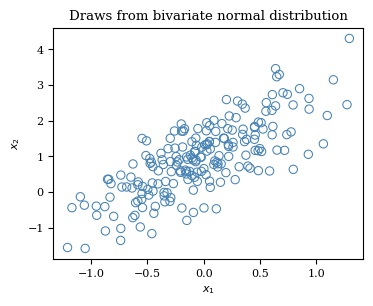

In [2]:
import matplotlib.pyplot as plt

# Scatter plot of sample
plt.scatter(x1, x2, linewidths=0.75, c='none', edgecolors='steelblue')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Draws from bivariate normal distribution')

#### Performing PCA manually using SVD

In a first step, we compute the principal components manually using SVD. Later on, we will examine how we do the same task using `scikit-learn`, one of the most widely used Python libraries for ML.

Before performing PCA, it is recommended to standardise the variables, i.e., transform them so that they have zero mean and unit variance. For this example, we will only demean the data but ignore the variance.

In [3]:
# Demean variables

# Mean of each column
Xmean = np.mean(X, axis=0)

# Matrix Xcen stores the centred (demeaned) columns of X
Xcen = (X - Xmean)

We can now use the SVD factorisation to compute the principal components. 
Once we have computed the matrix $\mathbf{V}$,
the data is transformed using the matrix multiplication
$$
\mathbf{P} = \mathbf{X} \mathbf{V}
$$
where $\mathbf{X}$ now denotes the standardised values.

In [4]:
from numpy.linalg import svd

# Apply SVD to standardised values. IMPORTANT: use full_matrices=False,
# otherwise SVD can take a long time and consume lots of memory!
U, S, Vt = svd(Xcen, full_matrices=False)

# Project onto basis spanned by principal components
PC = Xcen @ Vt.T

# Variance is highest for first component
var_PC = np.var(PC, axis=0, ddof=1)
print(f'Principal component variances: {var_PC}')

Principal component variances: [1.17607859 0.09444617]


We next plot the principal components in the original data space (left panel).
Moreover, the right panel shows the data rotated and rescaled so that each
axes corresponds to a principal component. Most of the variation
clearly occurs along the first axis!

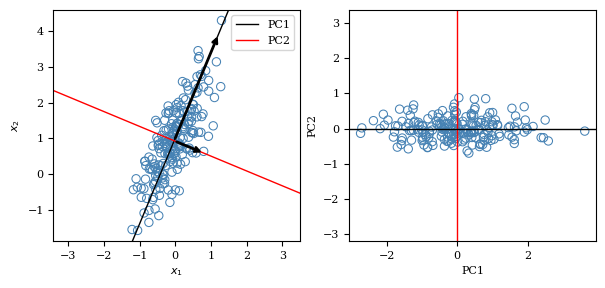

In [5]:
# Plot principal components

# Scatter plot of sample
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(7,3))
ax0.scatter(X[:, 0], X[:, 1], linewidths=0.75, c='none', edgecolors='steelblue')
ax0.axis('equal')
ax0.set_xlabel(r'$x_1$')
ax0.set_ylabel(r'$x_2$')
ax0.axline(Xmean, Xmean + Vt[0], label='PC1', lw=1.0, c='black', zorder=1)
ax0.axline(Xmean, Xmean + Vt[1], label='PC2', lw=1.0, c='red', zorder=1)

# Plot arrows pointing along axes of individual components
PC_arrows = Vt * np.sqrt(var_PC[:, None])
for v in PC_arrows:
    # Scale up arrows by 3 so that they are visible!
    ax0.annotate('', Xmean + v*3, Xmean, arrowprops=dict(arrowstyle='->', linewidth=2))

ax0.legend()

# Plot in principal component coordinate system
ax1.scatter(PC[:, 0], PC[:, 1], linewidths=0.75, c='none', edgecolors='steelblue')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.axis('equal')
ax1.axvline(0.0, lw=1.0, c='red')
ax1.axhline(0.0, lw=1.0, c='black')

#### Performing PCA using scikit-learn

Of course, in real applications we don't need to manually compute the
principal components but can use a library such as `scikit-learn` to do it for us (see the documentation for
[`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) and the section on PCA in the 
[official user guide](https://scikit-learn.org/stable/modules/decomposition.html#pca) 
for details).

Most models implemented in `scikit-learn` follow the same paradigm:

1.  We create an instance of a class that presents the model we want to
    fit to the data. In our present case, the class is called `PCA`.

    In many cases, we specify arguments that govern how a model is fit
    to the data, e.g., the number of principal components to use.
2.  We fit the model (on the training data set) by calling the `fit()` method.
3.  Frequently, we can use the `transform()` method to transform any other data
    (e.g., the test or validation sample) using the fitted model.

Note that in the case of PCA, `scikit-learn` automatically demeans the input data (but does not normalise the variance to 1), so we don't need to do it manually.

In [6]:
from sklearn.decomposition import PCA

# Use same data X as before

# Create PCA with 2 components (which is the max, since we have only two 
# variables)
pca = PCA(n_components=2)

# Perform PCA on input data
pca.fit(X)


PCA(n_components=2)

To obtain the transformed data, we call the 
[`transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform)
method. Note that we could have called [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) 
instead to perform the two previous steps in a single call.

In [7]:
# Obtain data projected onto principal components
PC_skl = pca.transform(X)

# Check that these are identical to PC we obtained manually
assert np.all(np.abs(PC_skl - PC) < 1.0e-10)

The principal component coefficients (used to create the transformed data) are stored in the attribute `components_` and are identical to the matrix $\mathbf{V}^\top$ we computed above.

In [8]:
# The attribute components_ can be used to retrieve the V' matrix
print("components_ (matrix V'):")
print(pca.components_)

# Check that these are identical to the matrix V' we computed via SVD
assert np.all(np.abs(pca.components_ - Vt) < 1.0e-10)

components_ (matrix V'):
[[ 0.38420018  0.92324981]
 [ 0.92324981 -0.38420018]]


The fitted `pca` object contains other useful attributes (see the 
[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) 
for a full list). For example, 

- `explained_variance_` stores the variances of all principal components; and
- `explained_variance_ratio_` stores the fraction of the variance "explained" by each component.

In [9]:
# The attribute explained_variance_ stores the variances of all PCs
print(f'Variance of each PC: {pca.explained_variance_}')

# Fraction of variance explained by each component:
print(f'Fraction of variance of each PC: {pca.explained_variance_ratio_}')

Variance of each PC: [1.17607859 0.09444617]
Fraction of variance of each PC: [0.92566365 0.07433635]


From the above output, we see that the first principal component captures about 92% of the variance in the data.

Finally, it is often interesting to examine how much any of the original variables in $\mathbf{X}$ contribute to each principal component. These contributions are called _loadings_ (again, note that the term "loadings" is not used consistently) and can be computed as follows:

In [10]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Use pandas DataFrame to tabulate loadings
import pandas as pd
pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=['X1', 'X2'])

,PC1,PC2
X1,0.416654,0.283734
X2,1.001238,-0.118073


The output tells us that the first principal component (which corresponds to the first column in the above matrix) loads more heavily on the second column of $\mathbf{X}$, which can also be seen from the previous graph.

### Example: Higher-dimensional data

#### Creating highly correlated inputs

The previous example was meant as an introduction but did not really illustrate the dimension reduction of PCA. After all, with only two dimensions there was not much to be reduced! Consider now a higher-dimensional (but still artificial) example with 10 dimensions.
For this purpose, we create highly correlated data as follows:

1. We draw $N$ independent samples from a bivariate normal distribution,
    $$
    \mathbf{z}_i \stackrel{\text{iid}}{\sim} N\left( \mathbf{0},
        \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_2^2 \end{bmatrix}
    \right)
    $$
    and stack them in the matrix $\mathbf{Z} \in \mathbb{R}^{N\times 2}$.
2. For some $2 \times K$ matrix $\mathbf{A}$ with $K \gg 2$, we compute
    $$
    \mathbf{X} = \mathbf{Z} \mathbf{A}
    $$
    which gives us the higher-dimensional matrix $\mathbf{X} \in \mathbb{R}^{N\times K}$.

For illustrative purposes, we draw the elements of $\mathbf{A}$ from a normal distribution but we could have picked almost any other coefficients. The point of the example is that we take two independent variables in $\mathbf{Z}$ and create $K \gg 2$ variables in $\mathbf{X}$ which are linear combinations of $\mathbf{Z}$. Intuitively, many of the columns of $\mathbf{X}$ will be highly correlated since they were created from the same variation in $\mathbf{Z}$.

In [11]:
from numpy.random import default_rng
import pandas as pd

rng = default_rng(123)

K = 10          # Number of columns in matrix X
N = 100         # Number of observations

# Std. dev. of columns in Z
sigma = np.array([1.0, 3.0])

# Draw 2 independent, normally distributed random variables and rescale
# their variances
Z = rng.normal(size=(N, 2)) * sigma

We can plot the columns of $\mathbf{Z}$ against each other to verify that they don't seem to exhibit any particular dependence structure.

Text(0, 0.5, 'Z2')

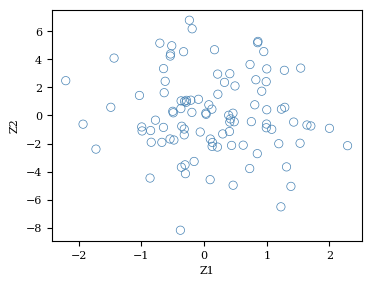

In [12]:
import matplotlib.pyplot as plt

plt.scatter(Z[:, 0], Z[:, 1], color='none', edgecolors='steelblue', lw=0.5)
plt.xlabel('Z1')
plt.ylabel('Z2')

Next, we create the transformation matrix $\mathbf{A}$. You can do this in various ways, so we simply choose to draw the elements of $\mathbf{A}$ from a standard normal distribution.

In [13]:
A = rng.normal(size=(Z.shape[1], K))

# Print first three columns of A in transposed form
A.T[:3]

array([[-0.93706677,  2.62894657],
       [-0.80933814,  0.45287643],
       [-0.41213169,  0.23403931]])

The above coefficients show us how the columns of $\mathbf{X}$ are formed: the first column is obtained as 
```python
X[:, 0] = -0.937 * Z[:, 0] + 2.629 * Z[:, 1]
``` 
and so on.

In [14]:
# Compute X as linear combinations of Z
X = Z @ A

By construction, the columns of $\mathbf{X}$ are highly correlated. We can illustrate this using pairwise scatter plots as follows:

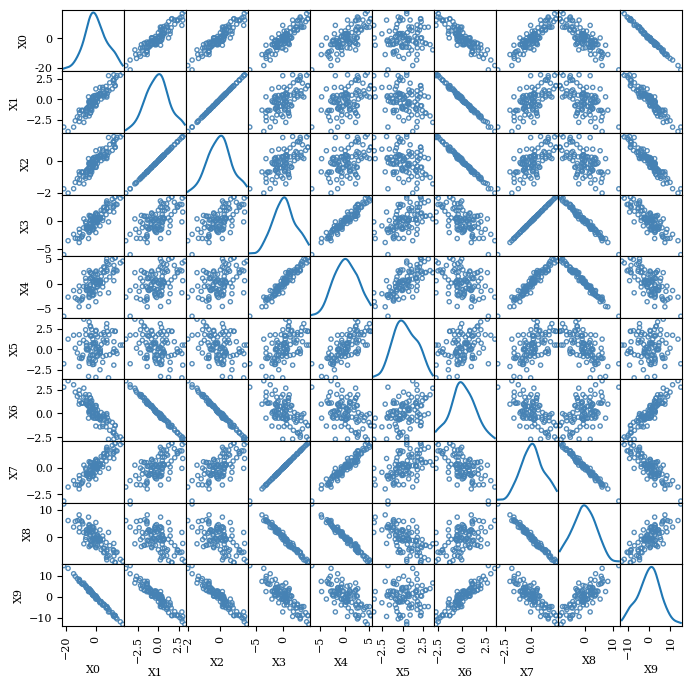

In [15]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(X, columns=[f'X{k}' for k in range(K)])

axes = scatter_matrix(df, figsize=(8, 8), 
    alpha=0.9, color='none', edgecolor='steelblue', 
    diagonal='kde')

Moreover, we can compute the pairwise correlation coefficients using `pandas`'s [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method which computes the correlation matrix between all columns of a `DataFrame`.

In [16]:
# Print only three decimal places
pd.set_option('display.precision', 3)

# Compute and print correlation matrix
df.corr()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
X0,1.000,0.931,0.933,0.893,0.739,0.067,-0.900,0.891,-0.824,-0.997
X1,0.931,1.000,1.000,0.667,0.443,-0.301,-0.997,0.665,-0.561,-0.955
X2,0.933,1.000,1.000,0.671,0.448,-0.295,-0.997,0.669,-0.565,-0.956
X3,0.893,0.667,0.671,1.000,0.963,0.510,-0.608,1.000,-0.991,-0.858
X4,0.739,0.443,0.448,0.963,1.000,0.722,-0.372,0.964,-0.991,-0.689
X5,0.067,-0.301,-0.295,0.510,0.722,1.000,0.373,0.513,-0.621,0.004
X6,-0.900,-0.997,-0.997,-0.608,-0.372,0.373,1.000,-0.605,0.495,0.929
X7,0.891,0.665,0.669,1.000,0.964,0.513,-0.605,1.000,-0.991,-0.857
X8,-0.824,-0.561,-0.565,-0.991,-0.991,-0.621,0.495,-0.991,1.000,0.782
X9,-0.997,-0.955,-0.956,-0.858,-0.689,0.004,0.929,-0.857,0.782,1.000


#### PCA with manually selected number of principle components

We now use `scikit-learn`'s `PCA` to perform the principal component analysis just as we did in the bivariate case.

In [17]:
from sklearn.decomposition import PCA

# Create PCA using max. available components
pca = PCA()

# Perform PCA on input data
PC = pca.fit_transform(X)

To get some intuition for the transformed data, we plot the first principal component (which captures most of the variation by construction) against some of the other principal components. As you can see in the code below, there is some variation left in the 2nd principal component, while for the 3rd and 4th components the data along these dimension is basically constant (this is also the case for the remaining principal components).

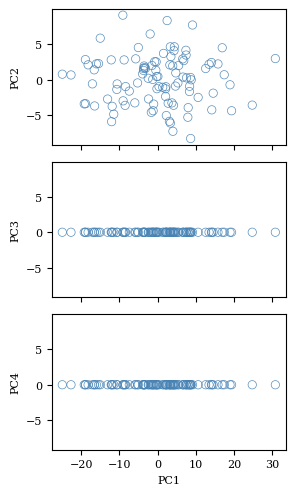

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(3, 5), sharex=True, sharey=True)

# Dictionary of common keyword arguments for scatter() function
kw = dict(color='none', alpha=0.9, edgecolor='steelblue', lw=0.5)

# Indices of PCs to plot against 1st PC
yi = [1, 2, 3]

for i, k in enumerate(yi):
    axes[i].scatter(PC[:, 0], PC[:, k], **kw)
    axes[i].set_ylabel(f'PC{k+1}')

axes[-1].set_xlabel('PC1')

fig.tight_layout()

To see what's going in, we create a graph that plots the share of total variance captured by each component. 
This type of plot is called a *scree plot* and is occasionally used to visually pin down the number of principal components to use.

The plot below shows that for principal components beyond the 2nd one, this share is zero. This should come as no surprise since we generated the higher-dimensional data in $\mathbf{X}$ from only two dimensions of independent data.

Text(0.5, 1.0, 'Scree plot')

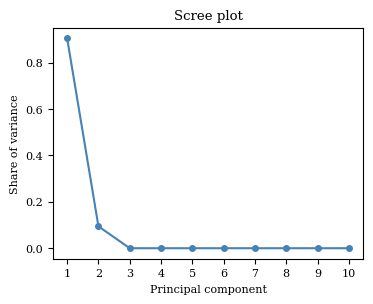

In [19]:
import matplotlib.pyplot as plt

xvalues = np.arange(K)
plt.plot(xvalues, pca.explained_variance_ratio_, color='steelblue', 
    marker='o', ms=4)
plt.xticks(xvalues, xvalues + 1)
plt.xlabel('Principal component')
plt.ylabel('Share of variance')
plt.title('Scree plot')

#### PCA with automatically selected number of principal components

Previously, we manually selected the number of principle components when constructing an instance of `PCA` (or we used the default, which takes the minimum of the number of rows and columns of $\mathbf{X}$). Alternatively, we can tell `scikit-learn` to automatically determine the number of components for us. For example, when the argument `n_components` is a floating-point number in (0, 1), `scikit-learn` interprets this as the minimum fraction of variance that should be explained and chooses the required number of principal components accordingly. To illustrate, let's perform PCA and request that the number of components should capture at leat 90% of the variance:

In [20]:
# Perform PCA, select components to capture 90% of variance
pca = PCA(n_components=0.9)

# Perform PCA on input data
PC = pca.fit_transform(X)

This selects only the first principal component which is what we would suspect when looking at the previous graph.

In [21]:
print(f'Number of components: {pca.n_components_}')

Number of components: 1


We conclude this section by plotting the loadings for each principal component (which happens to be only one in this case). Since the data was generated randomly, this plot is not particularly insightful but will be much more useful with real data.

Text(0.5, 0.98, 'Loadings for principal components')

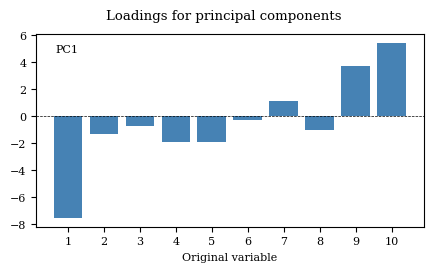

In [22]:
# Compute loadings for all PCs
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Number of selected PCs
Ncomp = pca.n_components_

fig, axes = plt.subplots(Ncomp, 1, figsize=(5, 2.5 * Ncomp), 
    sharex=True, sharey=True)

# Plot loadings for each PC
xvalues = np.arange(K)
for i, ax in enumerate(np.atleast_1d(axes)):
    ax.bar(xvalues, loadings[:, i], color='steelblue')
    ax.set_xticks(xvalues, xvalues+1)
    ax.set_xlabel('Original variable')
    ax.text(0.05, 0.95, f'PC{i+1}', transform=ax.transAxes, 
        ha='left', va='top')
    ax.axhline(0.0, lw=0.5, ls='--', c='black')

fig.suptitle(f'Loadings for principal components')